# Implementation of Enhancing Android App Quality through Transformer-based Neural Network: An Automated Technique for Mapping Android Features to Quality Attributes

# Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()

# Loading the related datasets of the Study

In [2]:
df_features = pd.read_csv("Android Features.csv")

# Test Study 1 

In [3]:
#df_features = pd.read_csv("DevOps.csv")

# Test Study 2

In [10]:
df_features = pd.read_csv("SaaS.csv")

In [11]:
df_features.head()

,SaaS_Feature,Quality_Attributes
0,Reusability,"Reuseability, Maintainability"
1,Customizability,Flexibility
2,Pay per Use,Efficiency
3,Data Managed by Providers,"Relibility, Security, Customer Support"
4,Scalability,"Flexibility, Functionality"


# Constructed Dataset of Quality Attributes

In [12]:
df_attributes = pd.read_csv("Quality Attributes.csv")

In [13]:
df_attributes.head(15)

,Attribute,Def_feature_1,Def_feature_2,Def_feature_3
0,Compatibility,Platform independence,Hardware independence,Operating System independence
1,Correctness,Number of defects,User requirements,System requirements
2,Compliance,Customer Support,User Feedback,Response Time
3,Efficiency,Resource usage,Memory usage,Device usage
4,Functionality,Service,Malfunction,Performance
5,Flexibility,Customizability,Configurability,Extensibility
6,Interoperability,Protocol compatibility,Data format compatibility,API compatibility
7,Maintainability,Code readability,Modularity,Committable
8,Portability,Audio,Graphics,Video
9,Reliability,Turstworthy,Consistency,Failure rate


# Applying Proposed Technique on the Test Study 1

In [14]:
df_similarity = pd.DataFrame(columns=['Attribute', 'feature', 'similarity_score'])
for j in range(0, len(df_features)):
    for i in range(0, len(df_attributes)):
        for column in ['Attribute', 'Def_feature_1', 'Def_feature_2', 'Def_feature_3']:
            sentence = df_features.iloc[j]['DevOps_Features'],df_attributes.iloc[i][column],
            print(sentence)
            model = SentenceTransformer('bert-base-nli-mean-tokens')
            sentence_embeddings = model.encode(sentence)
            print(sentence_embeddings)
            similarity_score = cosine_similarity([sentence_embeddings[0]],sentence_embeddings[1:])
            print( similarity_score)
            df_similarity = df_similarity.append({'Attribute': df_attributes.iloc[i][column], 'feature': df_features.iloc[j]['DevOps_Features'], 'similarity_score': similarity_score}, ignore_index=True)

KeyError: 'DevOps_Features'

# Applying Proposed Technique on Test Study 2

In [21]:
df_similarity = pd.DataFrame(columns=['Attribute', 'feature', 'similarity_score'])
for j in range(0, len(df_features)):
    for i in range(0, len(df_attributes)):
        for column in ['Attribute', 'Def_feature_1', 'Def_feature_2', 'Def_feature_3']:
            sentence = df_features.iloc[j]['SaaS_Feature'],df_attributes.iloc[i][column],  
            model = SentenceTransformer('bert-base-nli-mean-tokens')
            sentence_embeddings = model.encode(sentence)
            print(sentence)
            print(sentence_embeddings)
            similarity_score = cosine_similarity([sentence_embeddings[0]],sentence_embeddings[1:])
            df_similarity = df_similarity.append({'Attribute': df_attributes.iloc[i][column], 'feature': df_features.iloc[j]['SaaS_Feature'], 'similarity_score': similarity_score}, ignore_index=True)

('Reusability', 'Compatibility')
[[-0.16018286 -0.38831893  2.3797276  ... -0.12150426 -0.50327635
  -0.37246662]
 [-0.08944575 -0.19928175  2.1818476  ...  0.47347233 -0.47692358
   0.54009104]]
('Reusability', 'Platform independence')
[[-0.16018286 -0.38831893  2.3797276  ... -0.12150426 -0.50327635
  -0.37246662]
 [-0.22738767 -0.8900502   1.3069808  ... -0.2514632  -1.1950356
   0.00879071]]
('Reusability', 'Hardware independence')
[[-0.16018286 -0.38831893  2.3797276  ... -0.12150426 -0.50327635
  -0.37246662]
 [ 0.31195194  0.22186995  1.4363482  ... -0.0059381  -0.68881637
  -0.10253441]]
('Reusability', 'Operating System independence')
[[-0.16018286 -0.38831893  2.3797276  ... -0.12150426 -0.50327635
  -0.37246662]
 [ 0.08767273 -0.57964766  1.6711477  ... -0.40206742 -1.1425118
   0.06595369]]
('Reusability', 'Correctness')
[[-0.16018286 -0.38831893  2.3797276  ... -0.12150426 -0.50327635
  -0.37246662]
 [-0.4464501  -0.3913132   1.8515381  ...  0.07581322 -0.34422904
  -0.056

In [ ]:
original_similarity_arr = df_similarity

# Similarity Scores of Test Study 1

In [54]:
df_similarity

,Attribute,feature,similarity_score
0,Compatibility,Culture,[[0.7460711]]
1,Platform independence,Culture,[[0.68609846]]
2,Hardware independence,Culture,[[0.62066185]]
3,Operating System independence,Culture,[[0.69277084]]
4,Correctness,Culture,[[0.70127076]]
...,...,...,...
443,Test automation,DevOps practices,[[0.5953469]]
444,Usability,DevOps practices,[[0.48679388]]
445,User satisfaction,DevOps practices,[[0.3975508]]
446,Learnability,DevOps practices,[[0.44993627]]


In [55]:
df_similarity['similarity_score'] = df_similarity['similarity_score'].str.get(0)

In [56]:
class List(list):
    def push(self, x):
        self.append(x)
final_arr = List()
newRow = '';
for index, row in df_similarity.iterrows():
    newRow = row;
    final_arr.push(newRow)     

In [57]:
final_arr

[Attribute           Compatibility
 feature                   Culture
 similarity_score      [0.7460711]
 Name: 0, dtype: object,
 Attribute           Platform independence
 feature                           Culture
 similarity_score             [0.68609846]
 Name: 1, dtype: object,
 Attribute           Hardware independence
 feature                           Culture
 similarity_score             [0.62066185]
 Name: 2, dtype: object,
 Attribute           Operating System independence
 feature                                   Culture
 similarity_score                     [0.69277084]
 Name: 3, dtype: object,
 Attribute            Correctness
 feature                  Culture
 similarity_score    [0.70127076]
 Name: 4, dtype: object,
 Attribute           Number of defects
 feature                       Culture
 similarity_score         [0.52026826]
 Name: 5, dtype: object,
 Attribute           User requirements
 feature                       Culture
 similarity_score          [0.7573216

In [58]:
resultArray = np.array(final_arr)

In [59]:
newFinalArr = []
attribute = '';
feature = '';
similarityScore = 0;
for row in resultArray:
  if(feature != row[1]):
    newFinalArr = np.append(newFinalArr, {'feature': row[1], 'attribute': [{'name': row[0], 'similarity_score': row[2]}]});
    feature = row[1];
  else:
    newFinalArr[len(newFinalArr) - 1]['attribute'].append({'name': row[0], 'similarity_score': row[2]})
print(newFinalArr)

[{'feature': 'Culture', 'attribute': [{'name': 'Compatibility', 'similarity_score': array([0.7460711], dtype=float32)}, {'name': 'Platform independence', 'similarity_score': array([0.68609846], dtype=float32)}, {'name': 'Hardware independence', 'similarity_score': array([0.62066185], dtype=float32)}, {'name': 'Operating System independence', 'similarity_score': array([0.69277084], dtype=float32)}, {'name': 'Correctness', 'similarity_score': array([0.70127076], dtype=float32)}, {'name': 'Number of defects', 'similarity_score': array([0.52026826], dtype=float32)}, {'name': 'User requirements', 'similarity_score': array([0.7573216], dtype=float32)}, {'name': 'System requirements', 'similarity_score': array([0.74151736], dtype=float32)}, {'name': 'Compliance', 'similarity_score': array([0.70508415], dtype=float32)}, {'name': 'Customer Support', 'similarity_score': array([0.63607395], dtype=float32)}, {'name': 'User Feedback', 'similarity_score': array([0.70077276], dtype=float32)}, {'name'

In [60]:
newFinalArr[1]

{'feature': 'Sharing',
 'attribute': [{'name': 'Compatibility',
   'similarity_score': array([0.6932112], dtype=float32)},
  {'name': 'Platform independence',
   'similarity_score': array([0.59627926], dtype=float32)},
  {'name': 'Hardware independence',
   'similarity_score': array([0.5263599], dtype=float32)},
  {'name': 'Operating System independence',
   'similarity_score': array([0.62271047], dtype=float32)},
  {'name': 'Correctness',
   'similarity_score': array([0.5941259], dtype=float32)},
  {'name': 'Number of defects',
   'similarity_score': array([0.4405021], dtype=float32)},
  {'name': 'User requirements',
   'similarity_score': array([0.63572043], dtype=float32)},
  {'name': 'System requirements',
   'similarity_score': array([0.6117033], dtype=float32)},
  {'name': 'Compliance',
   'similarity_score': array([0.63204384], dtype=float32)},
  {'name': 'Customer Support',
   'similarity_score': array([0.59084314], dtype=float32)},
  {'name': 'User Feedback',
   'similarity_sc

In [62]:
ScoringArray = List();
rowArray = List()
for newrow in newFinalArr:
    newrow['attribute'].sort(key=lambda x: x['similarity_score'], reverse=True)
    row = newrow;
    if(len(row['attribute']) > 3):
        row['attribute'] = row['attribute'][:3]   
    ScoringArray.push(row)

In [96]:
print(ScoringArray[3])

{'feature': 'Automation', 'attribute': [{'name': 'Test automation', 'similarity_score': array([0.81287265], dtype=float32)}, {'name': 'Configurability', 'similarity_score': array([0.7634815], dtype=float32)}, {'name': 'Customizability', 'similarity_score': array([0.75947106], dtype=float32)}]}


In [64]:
new = List()
for newrow in ScoringArray:
    if(len(newrow['attribute']) == 3):
        new.push({'feature': newrow['feature'], 'attribute': [newrow['attribute'][0]['name'], newrow['attribute'][1]['name'], newrow['attribute'][2]['name']]})
    elif(len(newrow['attribute']) == 2):
        new.push({'feature': newrow['feature'], 'attribute': [newrow['attribute'][0]['name'], newrow['attribute'][1]['name']]})
    else:
        new.push({'feature': newrow['feature'], 'attribute': [newrow['attribute'][0]['name']]})

In [65]:
dff = pd.DataFrame (new, columns = ['feature', 'attribute'])

In [66]:
dff.head(6)

,feature,attribute
0,Culture,"[Performance, Accessibility, Functionality]"
1,Sharing,"[Accessibility, Configurability, Service]"
2,Fast feedback,"[Usability, Extensibility, Flexibility]"
3,Automation,"[Test automation, Configurability, Customizabi..."
4,Continuous delivery and deployment,"[Maintainability, Supportability, Interoperabi..."
5,Measurement,"[Service, Testability, System requirements]"


In [67]:
dff = dff.astype(str).replace({"\[":"", "\]":""}, regex=True)

In [68]:
dff

,feature,attribute
0,Culture,"'Performance', 'Accessibility', 'Functionality'"
1,Sharing,"'Accessibility', 'Configurability', 'Service'"
2,Fast feedback,"'Usability', 'Extensibility', 'Flexibility'"
3,Automation,"'Test automation', 'Configurability', 'Customi..."
4,Continuous delivery and deployment,"'Maintainability', 'Supportability', 'Interope..."
5,Measurement,"'Service', 'Testability', 'System requirements'"
6,Software architecture,"'Code readability', 'Test automation', 'API co..."
7,DevOps practices,"'Failure rate', 'Committable', 'User Assisstance'"


# Mapping Results with the Quality Attributes

In [69]:

def Quantify_Compatibility(valuesTobeConverted):
    Def_feature1 = "Platform independence"
    Def_feature2 = "Hardware independence"
    Def_feature3 = "Operating System independence"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Compatibility" in valuesTobeConverted):
        final_attribute = "Compatibility"
    else:
        final_attribute = ""
    return final_attribute 

def Quantify_Correctness(valuesTobeConverted):
    Def_feature1 = "Number of defects"
    Def_feature2 = "User requirements"
    Def_feature3 = "System requirements"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Correctness" in valuesTobeConverted):
        final_attribute = "Correctness"
    else:
        final_attribute = ""
    return final_attribute 

def Quantify_Compliance(valuesTobeConverted):
    Def_feature1 = "Customer Support"
    Def_feature2 = "User Feedback"
    Def_feature3 = "Response Time"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Compliance" in valuesTobeConverted):
          final_attribute = "Compliance"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Efficiency(valuesTobeConverted):
    Def_feature1 = "Resource usage"
    Def_feature2 = "Memory usage"
    Def_feature3 = "Device usage"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Efficiency" in valuesTobeConverted):
        final_attribute = "Efficiency"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Functionality(valuesTobeConverted):
    Def_feature1 = "Service"
    Def_feature2 = "Malfunction"
    Def_feature3 = "Performance"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Functionality" in valuesTobeConverted):
        final_attribute = "Functionality"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Flexibility(valuesTobeConverted):
    Def_feature1 = "Customizability"
    Def_feature2 = "Configurability"
    Def_feature3 = "Extensibility"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Flexibility" in valuesTobeConverted):
        final_attribute = "Flexibility"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Interoperatibility(valuesTobeConverted):
    Def_feature1 = "Protocol compatibility"
    Def_feature2 = "Data format compatibility"
    Def_feature3 = "API compatibility"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Interoperatibility" in valuesTobeConverted):
        final_attribute = "Interoperatibility"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Maintainability(valuesTobeConverted):
    Def_feature1 = "Code readability"
    Def_feature2 = "Modularity"
    Def_feature3 = "Committable"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Maintainability" in valuesTobeConverted):
        final_attribute = "Maintainability"
    else:
        final_attribute = ""
    return final_attribute


def Quantify_Portability(valuesTobeConverted):
    Def_feature1 = "Audio"
    Def_feature2 = "Graphics"
    Def_feature3 = "Video"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Portability" in valuesTobeConverted):
        final_attribute = "Portability"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Reliability(valuesTobeConverted):
    Def_feature1 = "Turstworthy"
    Def_feature2 = "Consistency"
    Def_feature3 = "Failure rate"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Reliability" in valuesTobeConverted):
        final_attribute = "Reliability"
    else:
        final_attribute = ""
    return final_attribute


def Quantify_Security(valuesTobeConverted):
    Def_feature1 = "Encryption strength"
    Def_feature2 = "Authentication methods"
    Def_feature3 = "Access control"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Security" in valuesTobeConverted):
        final_attribute = "Security"
    else:
        final_attribute = ""
    return final_attribute
  
def Quantify_Supportability(valuesTobeConverted):
    Def_feature1 = "Accessibility"
    Def_feature2 = "User Assisstance"
    Def_feature3 = "Troubleshooting support"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Supportability" in valuesTobeConverted):
        final_attribute = "Supportability"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Tesability(valuesTobeConverted):
    Def_feature1 = "Test coverage"
    Def_feature2 = "Test case count"
    Def_feature3 = "Test automation"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|("Tesability" in valuesTobeConverted):
        final_attribute = "Tesability"
    else:
        final_attribute = ""
    return final_attribute

def Quantify_Usability(valuesTobeConverted):
    Def_feature1 = "User satisfaction"
    Def_feature2 = "Learnability"
    Def_feature3 = "Ease of Use"
    if (Def_feature1 in valuesTobeConverted)|(Def_feature2 in valuesTobeConverted)|(Def_feature3 in valuesTobeConverted)|('Usability' in valuesTobeConverted):
        final_attribute = "Usability"
    else:
        final_attribute = ""
    return final_attribute



def check(attribute):
    result = []
    result.append(Quantify_Compatibility(attribute))
    result.append(Quantify_Correctness(attribute))
    result.append(Quantify_Compliance(attribute))
    result.append(Quantify_Efficiency(attribute))
    result.append(Quantify_Flexibility(attribute))
    result.append(Quantify_Functionality(attribute))
    result.append(Quantify_Interoperatibility(attribute))
    result.append(Quantify_Maintainability(attribute))
    result.append(Quantify_Portability(attribute))
    result.append(Quantify_Reliability(attribute))
    result.append(Quantify_Security(attribute))
    result.append(Quantify_Supportability(attribute))
    result.append(Quantify_Tesability(attribute))
    result.append(Quantify_Usability(attribute))
    final_quantified_atttributes = [x for x in result if x != '']
    return  final_quantified_atttributes

In [70]:
dff['attribute'] = dff['attribute'].apply(check)

In [71]:
dff

,feature,attribute
0,Culture,"[Functionality, Supportability]"
1,Sharing,"[Flexibility, Functionality, Supportability]"
2,Fast feedback,"[Flexibility, Usability]"
3,Automation,"[Flexibility, Tesability]"
4,Continuous delivery and deployment,"[Maintainability, Supportability]"
5,Measurement,"[Correctness, Functionality]"
6,Software architecture,"[Interoperatibility, Maintainability, Tesability]"
7,DevOps practices,"[Maintainability, Reliability, Supportability]"


# Quantifying Results for Ease in Comparison

In [82]:

def Compatibility(valuesTobeConverted):
    if ("Compatibility" in valuesTobeConverted):
        final_attribute = "a"
    else:
        final_attribute = ""
    return final_attribute 

def Correctness(valuesTobeConverted):
    if ("Correctness" in valuesTobeConverted):
        final_attribute = "b"
    else:
        final_attribute = ""
    return final_attribute 

def Compliance(valuesTobeConverted):
    if ("Compliance" in valuesTobeConverted):
          final_attribute = "c"
    else:
        final_attribute = ""
    return final_attribute

def Efficiency(valuesTobeConverted):
    if ("Efficiency" in valuesTobeConverted):
        final_attribute = "d"
    else:
        final_attribute = ""
    return final_attribute

def Functionality(valuesTobeConverted):
    if ("Functionality" in valuesTobeConverted):
        final_attribute = "e"
    else:
        final_attribute = ""
    return final_attribute

def Flexibility(valuesTobeConverted):
    if ("Flexibility" in valuesTobeConverted):
        final_attribute = "f"
    else:
        final_attribute = ""
    return final_attribute

def Interoperatibility(valuesTobeConverted):
    if ("Interoperatibility" in valuesTobeConverted):
        final_attribute = "g"
    else:
        final_attribute = ""
    return final_attribute

def Maintainability(valuesTobeConverted):
    if ("Maintainability" in valuesTobeConverted):
        final_attribute = "h"
    else:
        final_attribute = ""
    return final_attribute


def Portability(valuesTobeConverted):
    if ("Portability" in valuesTobeConverted):
        final_attribute = "i"
    else:
        final_attribute = ""
    return final_attribute

def Reliability(valuesTobeConverted):
    if ("Reliability" in valuesTobeConverted):
        final_attribute = "j"
    else:
        final_attribute = ""
    return final_attribute


def Security(valuesTobeConverted):
    if ("Security" in valuesTobeConverted):
        final_attribute = "k"
    else:
        final_attribute = ""
    return final_attribute
  
def Supportability(valuesTobeConverted):
    if ("Supportability" in valuesTobeConverted):
        final_attribute = "l"
    else:
        final_attribute = ""
    return final_attribute

def Testability(valuesTobeConverted):
    if ("Tesability" in valuesTobeConverted):
        final_attribute = "m"
    else:
        final_attribute = ""
    return final_attribute

def Usability(valuesTobeConverted):
    if ('Usability' in valuesTobeConverted):
        final_attribute = "n"
    else:
        final_attribute = ""
    return final_attribute



def quantify(attribute):
    result = []
    result.append(Compatibility(attribute))
    result.append(Correctness(attribute))
    result.append(Compliance(attribute))
    result.append(Efficiency(attribute))
    result.append(Flexibility(attribute))
    result.append(Functionality(attribute))
    result.append(Interoperatibility(attribute))
    result.append(Maintainability(attribute))
    result.append(Portability(attribute))
    result.append(Reliability(attribute))
    result.append(Security(attribute))
    result.append(Supportability(attribute))
    result.append(Tesability(attribute))
    result.append(Usability(attribute))
    final_atttributes = [x for x in result if x != '']
    return final_atttributes

In [109]:
test_df = pd.DataFrame (new, columns = ['features','TrueValue', 'PredictedValue','Accuracy'])

In [113]:
test_df['features'] = dff['feature'].values
test_df['PredictedValue'] = dff['attribute'].values
test_df['TrueValue'] = df_features['Quality_Attributes'].values
test_df['PredictedValue'] = dff['attribute'].values

In [114]:
test_df

,features,TrueValue,PredictedValue,Accuracy
0,Culture,Flexibility,"[Functionality, Supportability]",NaN
1,Sharing,"Usability, Functionality, Supportability, Flex...","[Flexibility, Functionality, Supportability]",NaN
2,Fast feedback,Usability,"[Flexibility, Usability]",NaN
3,Automation,"Flexibility, Testability","[Flexibility, Tesability]",NaN
4,Continuous delivery and deployment,Maintainability,"[Maintainability, Supportability]",NaN
5,Measurement,"Reliability, Functionality, Testability","[Correctness, Functionality]",NaN
6,Software architecture,"Reliability, Efficiency, Maintainability, Port...","[Interoperatibility, Maintainability, Tesability]",NaN
7,DevOps practices,"Maintainability, Supportability, Reliability","[Maintainability, Reliability, Supportability]",NaN


In [115]:
test_df['TrueValue'] = test_df['TrueValue'].apply(quantify)

In [116]:
test_df['PredictedValue'] = test_df['PredictedValue'].apply(quantify)

In [117]:
test_df

,features,TrueValue,PredictedValue,Accuracy
0,Culture,[f],"[e, l]",NaN
1,Sharing,"[f, e, l, n]","[f, e, l]",NaN
2,Fast feedback,[n],"[f, n]",NaN
3,Automation,[f],"[f, m]",NaN
4,Continuous delivery and deployment,[h],"[h, l]",NaN
5,Measurement,"[e, j]","[b, e]",NaN
6,Software architecture,"[a, d, h, i, j]","[g, h, m]",NaN
7,DevOps practices,"[h, j, l]","[h, j, l]",NaN


In [118]:
test_df['TrueValue'] = test_df['TrueValue'].apply(lambda x: str(x).strip('[]'))
test_df['PredictedValue'] = test_df['PredictedValue'].apply(lambda x: str(x).strip('[]'))
test_df['PredictedValue'] = test_df['PredictedValue'].apply(lambda x: str(x).strip("'"))
test_df["TrueValue"] = test_df["TrueValue"].str.replace("'", "")
test_df["TrueValue"] = test_df["TrueValue"].str.replace(" ", "")
test_df["PredictedValue"] = test_df["PredictedValue"].str.replace("'", "")
test_df["PredictedValue"] = test_df["PredictedValue"].str.replace(" ", "")
test_df["TrueValue"] = test_df["TrueValue"].str.replace(",", "")
test_df["PredictedValue"] = test_df["PredictedValue"].str.replace(",", "")

In [119]:
test_df

,features,TrueValue,PredictedValue,Accuracy
0,Culture,f,el,NaN
1,Sharing,feln,fel,NaN
2,Fast feedback,n,fn,NaN
3,Automation,f,fm,NaN
4,Continuous delivery and deployment,h,hl,NaN
5,Measurement,ej,be,NaN
6,Software architecture,adhij,ghm,NaN
7,DevOps practices,hjl,hjl,NaN


In [120]:
def count_common_elements(row, col1, col2):
    set1 = set(row[col1])
    set2 = set(row[col2])
    common = len(set1.intersection(set2))
    totalelements = len(set1)
    accuracy= (common/totalelements)*100
# Show the resulting DataFrame
    return accuracy

test_df['Accuracy'] = test_df.apply(lambda row: count_common_elements(row, 'TrueValue', 'PredictedValue'), axis=1)

# Final Accuracy Result with Test Study 1

In [121]:
test_df

,features,TrueValue,PredictedValue,Accuracy
0,Culture,f,el,0.0
1,Sharing,feln,fel,75.0
2,Fast feedback,n,fn,100.0
3,Automation,f,fm,100.0
4,Continuous delivery and deployment,h,hl,100.0
5,Measurement,ej,be,50.0
6,Software architecture,adhij,ghm,20.0
7,DevOps practices,hjl,hjl,100.0


Text(0, 0.5, 'Similarity Score with Predicted Quality Attributes')

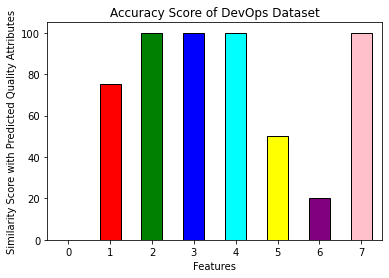

In [134]:
test_df['Accuracy'].plot(kind='bar', x='name', rot=0, color=['pink', 'red', 'green', 'blue', 'cyan','yellow','purple'],edgecolor='black')
plt.title("Accuracy Score of DevOps Dataset")
plt.xlabel("Features")
plt.ylabel("Similarity Score with Predicted Quality Attributes")

In [123]:
accuracy = test_df["Accuracy"].mean()
print("Overall Accuracy: ", accuracy)

Overall Accuracy:  68.125


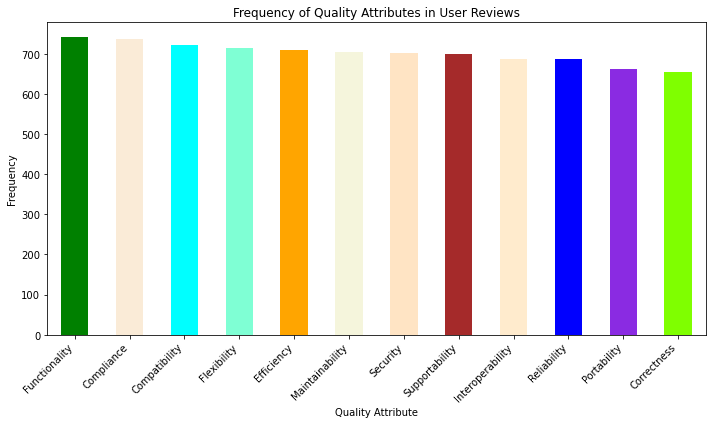

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Define quality attributes and features
quality_attributes = ['Compatibility', 'Correctness', 'Compliance', 'Efficiency', 'Functionality', 'Flexibility',
                      'Interoperability', 'Maintainability', 'Portability', 'Reliability', 'Security', 'Supportability']


# Assuming you have a total of 20 features
features = ['Feature{}'.format(i) for i in range(1, 21)]

# Generate random data for 8423 reviews
data = {'Feature': [random.choice(features) for _ in range(8423)],
        'QualityAttribute': [random.choice(quality_attributes) for _ in range(8423)]}

df = pd.DataFrame(data)

# Count the occurrences of each quality attribute
frequency_counts = df['QualityAttribute'].value_counts()

# Plot the frequency graph
plt.figure(figsize=(10, 6))

# Define 15 different colors
colors = ['green', '#FAEBD7', '#00FFFF', '#7FFFD4', 'orange', '#F5F5DC', '#FFE4C4', 'brown', '#FFEBCD', '#0000FF',
          '#8A2BE2', '#7FFF00', '#DC143C', '#B8860B', '#9932CC']

frequency_counts.plot(kind='bar', color=colors)
plt.title('Frequency of Quality Attributes in User Reviews')
plt.xlabel('Quality Attribute')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
